In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px 
import plotly.graph_objects as go
from scipy.signal import find_peaks
from scipy import interpolate

In [13]:
data = pd.read_csv('C:\\Users\\bagir\\Downloads\\2025-03-20_18-17-32_266_rcms.csv')

In [14]:
data

,TIME_s,RHEO_1_mΩ,BASE_1_Ω,ECG_V,RHEO_2_mΩ,BASE_2_Ω,QS_1_Ω,QS_2_Ω
0,0.000,-104.647,47.072,0.019,-3.897,30.988,1110.0,1110.0
1,0.005,-109.738,47.063,0.021,-3.115,30.988,1091.0,1091.0
2,0.010,-114.829,47.055,0.023,-2.332,30.988,1073.0,1073.0
3,0.015,-119.921,47.046,0.026,-1.550,30.988,1054.0,1054.0
4,0.020,-125.012,47.038,0.028,-0.767,30.989,1036.0,1036.0
...,...,...,...,...,...,...,...,...
388320,1941.600,95.003,43.775,-0.045,-6.905,25.066,1663.0,1663.0
388321,1941.605,95.575,43.775,-0.036,-6.345,25.066,1666.0,1666.0
388322,1941.610,96.147,43.776,-0.027,-5.785,25.066,1669.0,1669.0
388323,1941.615,96.719,43.776,-0.018,-5.225,25.066,1672.0,1672.0


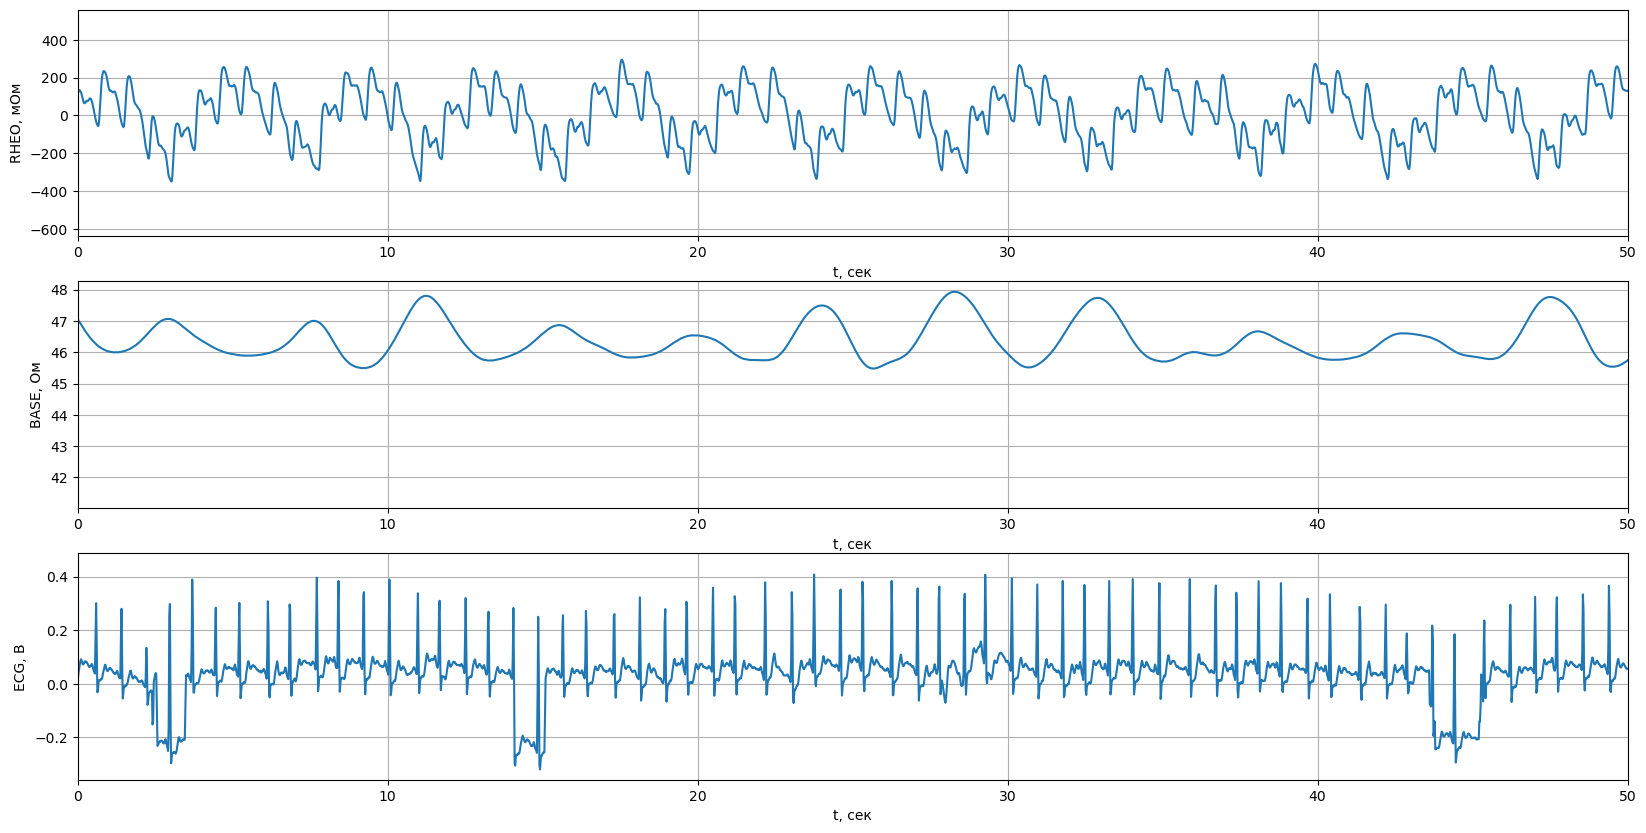

In [112]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
left =0;
right=50;

#plt.plot(data.TIME_s, data.RHEO_1_mΩ, data.TIME_s, data.ECG_V)
plt.subplot(3, 1, 1)
plt.plot(data.TIME_s, -data.RHEO_1_mΩ)
plt.xlim([left, right])
plt.xlabel("t, сек")
plt.ylabel("RHEO, мОм")
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(data.TIME_s, data.ECG_V)
plt.xlim([left, right])
plt.xlabel("t, сек")
plt.ylabel("ECG, В")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(data.TIME_s, data.BASE_1_Ω)
plt.xlim([left, right])
plt.xlabel("t, сек")
plt.ylabel("BASE, Ом")
plt.grid(True)

In [16]:
#поиск частоты дыхания по базовому импедансу
R, _ =find_peaks(data.BASE_1_Ω)

(0.0, 100.0)

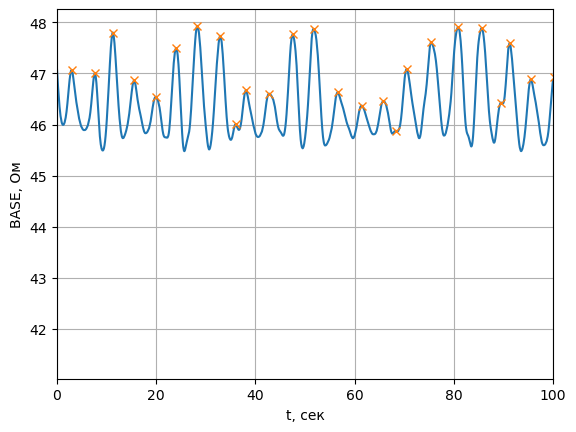

In [24]:
'''
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(8)
'''
plt.plot(data.TIME_s, data.BASE_1_Ω)
plt.plot(data.TIME_s[R], data.BASE_1_Ω[R], 'x')

plt.grid(True)
plt.xlabel("t, сек")
plt.ylabel("BASE, Ом")
plt.xlim([left, 100])


In [25]:
#расчет дастоты дыхания
a=len(R)/data.TIME_s[len(data.TIME_s)-1]
a

0.26421235875197

In [26]:
#Фильтрация сигнала
from scipy.signal import butter, filtfilt

In [27]:
#режекторный фильтр
def bandstop_filter(data, lowcut, highcut, fs, order):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='bandstop', analog=False)
    y = filtfilt(b, a, data)
    return y

In [28]:
# Параметры фильтра
fs = 1/data.TIME_s[1]  # Частота дискретизации
order = 3  # Порядок фильтра Баттерворта

(0.0, 50.0)

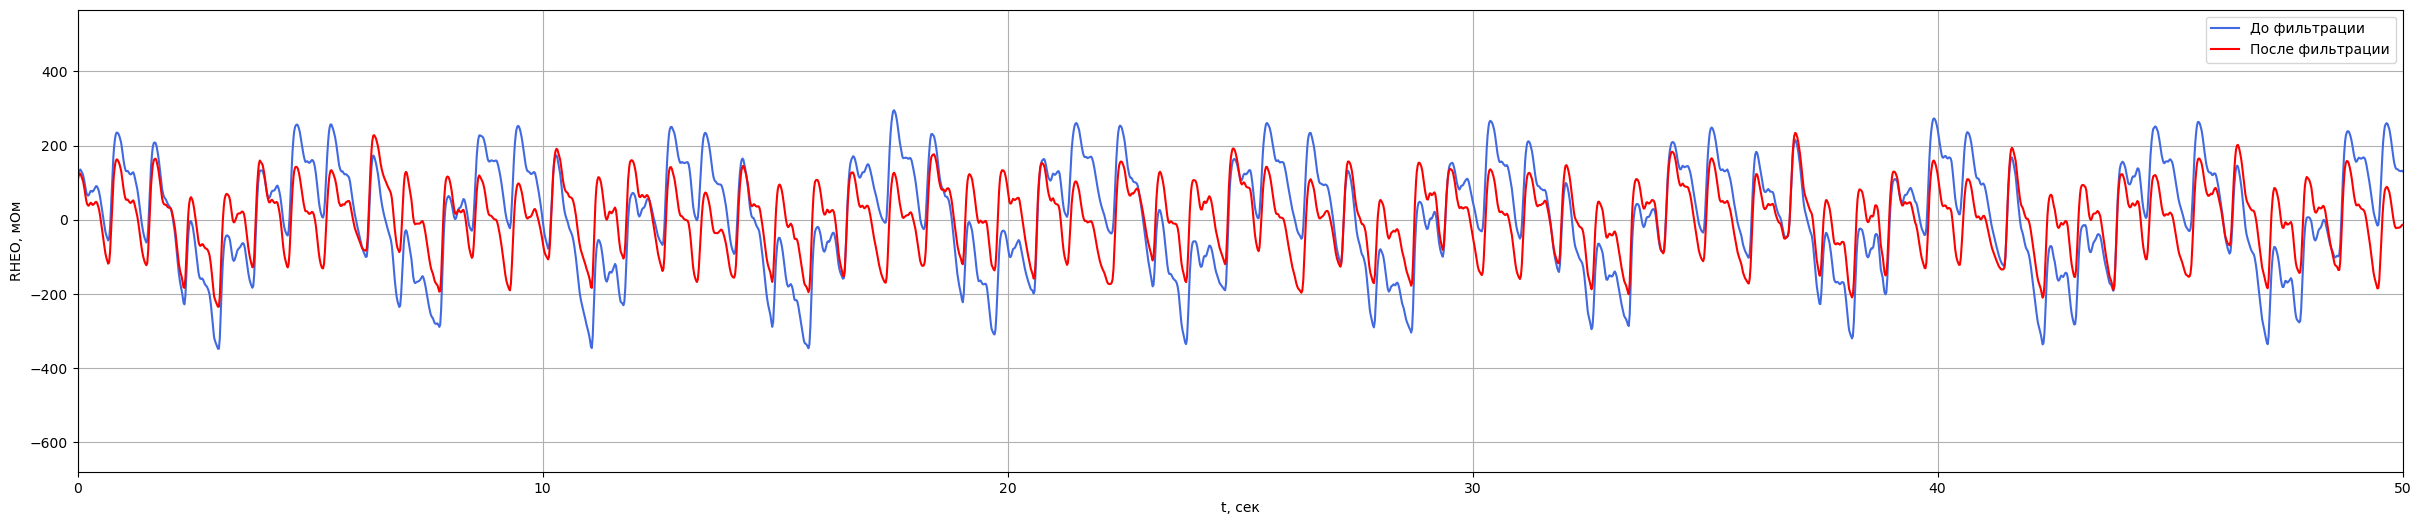

In [54]:
q=bandstop_filter(-data.RHEO_1_mΩ, a-0.06, a+0.06, fs, order)

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(6)

plt.plot(data.TIME_s, -data.RHEO_1_mΩ, color='royalblue', label='До фильтрации')
plt.plot(data.TIME_s, q, color='red', label='После фильтрации')
plt.legend()

plt.xlabel("t, сек")
plt.ylabel("RHEO, мОм")

plt.grid(True)
plt.xlim([left, right])

Text(0, 0.5, 'ECG, В')

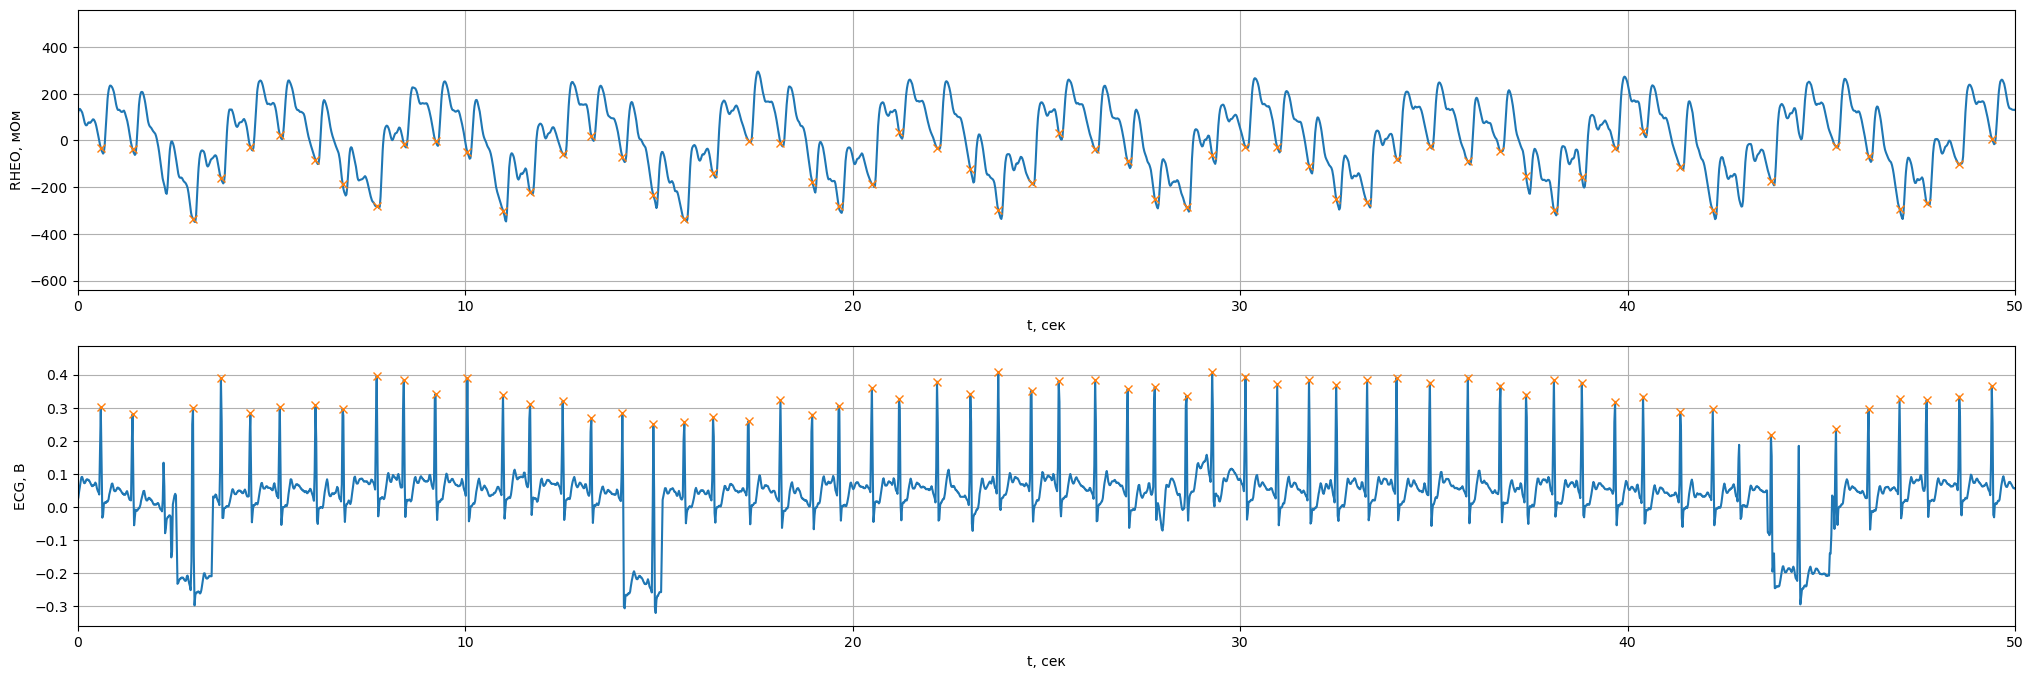

In [60]:
#поиск точек на реограмме, соответствующих R-зубцам
p, _ =find_peaks(data.ECG_V, height=0.2)

f = plt.figure()
f.set_figwidth(25)
f.set_figheight(8)

plt.subplot(2, 1, 1)
plt.plot(data.TIME_s, -data.RHEO_1_mΩ)
plt.plot(data.TIME_s[p], -data.RHEO_1_mΩ[p], 'x')
plt.xlim([left, right])
plt.xlabel("t, сек")
plt.ylabel("RHEO, мОм")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(data.TIME_s, data.ECG_V)
plt.plot(data.TIME_s[p], data.ECG_V[p], 'x')
plt.xlim([left, right])
plt.grid(True)
plt.xlabel("t, сек")
plt.ylabel("ECG, В")

In [129]:
#кубический сплайн
spline=interpolate.CubicSpline(data.TIME_s[p], -data.RHEO_1_mΩ[p])

#полученного значений сплайна для всех отсчетов сигнала реограммы
spline_delete=spline(data.TIME_s)

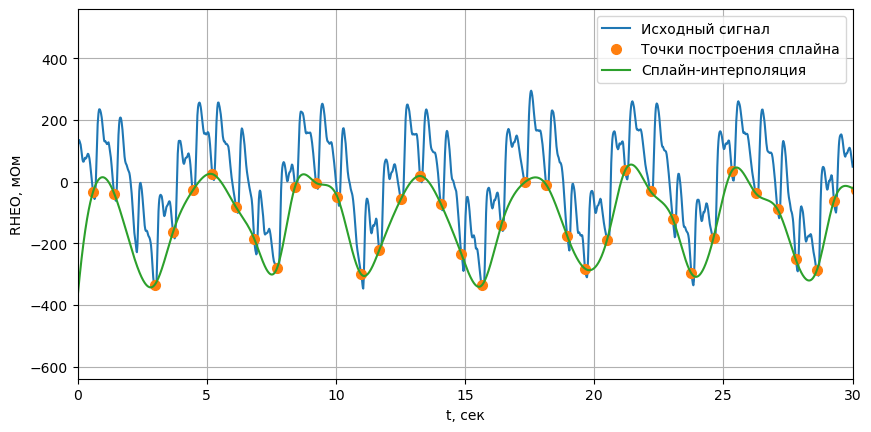

In [134]:
f = plt.figure()
f.set_figwidth(10)

plt.plot(data.TIME_s, -data.RHEO_1_mΩ, label='Исходный сигнал')
plt.plot(data.TIME_s[p], -data.RHEO_1_mΩ[p], 'o', markersize = 7, label='Точки построения сплайна')

plt.plot(data.TIME_s, spline_delete, label='Сплайн-интерполяция')
         
plt.xlim([left,30])
plt.xlabel("t, сек")
plt.ylabel("RHEO, мОм")
plt.legend()
plt.grid(True)

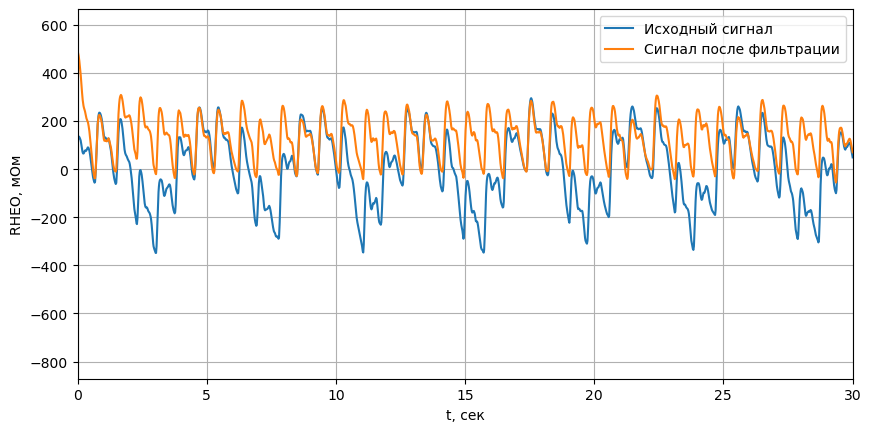

In [136]:
#удаление полученного сплайна из сигнала реограммы
new=-data.RHEO_1_mΩ-spline_delete

f = plt.figure()
f.set_figwidth(10)

plt.plot(data.TIME_s,-data.RHEO_1_mΩ, label='Исходный сигнал')

plt.plot(data.TIME_s,new, label='Cигнал после фильтрации')
         
plt.xlim([left,30])
plt.xlabel("t, сек")
plt.ylabel("RHEO, мОм")
plt.legend()
plt.grid(True)